### Logistic Regression with Lasso 

In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import os

from matplotlib import pyplot as plt
import seaborn as sns 
%matplotlib inline
from datetime import datetime
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import scikitplot as skplt
from sklearn.svm import l1_min_c
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import scikitplot as skplt

In [3]:
# Reading training dataset
userhome = os.path.expanduser('~')
path = '/Documents/'
X_train = pd.read_csv(userhome + path + 'X_train_v2.csv')
Y_train = pd.read_csv(userhome + path + 'Y_train_v2.csv',header=None )

In [4]:
Y_train = Y_train.iloc[:,0]

In [5]:
Y_train.shape

(39321,)

In [6]:
#checking missing records
X_train.iloc[:,:].isnull().any()

year_2014                      False
year_2015                      False
item_category_Accessories      False
item_category_Battery          False
item_category_Books            False
item_category_Cinema           False
item_category_Game Consoles    False
item_category_Games            False
item_category_Gifts            False
item_category_Music            False
item_category_Office           False
item_category_Official         False
item_category_Programs         False
Item Type_Electronics          False
item_price_s                   False
item_cnt_month_s               False
Sales_vol_s                    False
dtype: bool

Computing regularization path ...


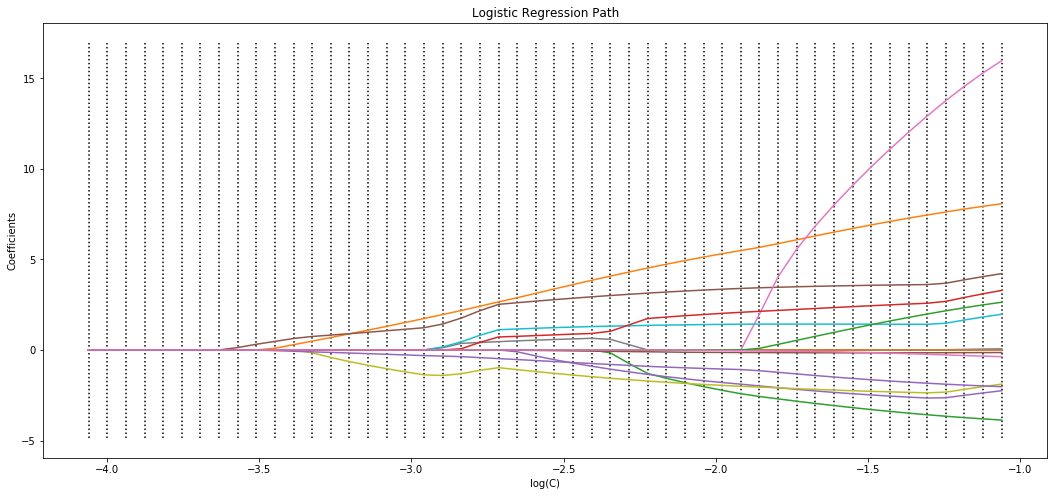

In [7]:
# calculating inverse regularization parameters

cs = l1_min_c(X_train, Y_train, loss='log') * np.logspace(0, 3)

# Creating a lasso plot to perform feature selection
print("Computing regularization path ...")
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
fig, ax = plt.subplots(figsize=(18,8))
coefs_ = []
for c in cs:
    clf.set_params(C=c)
    clf.fit(X_train, Y_train)
    coefs_.append(clf.coef_.ravel().copy())

coefs_ = np.array(coefs_)
ymin, ymax = plt.ylim()
plt.plot(np.log10(cs), coefs_)
ymin, ymax = plt.ylim()
plt.vlines( np.log10(cs), ymin,ymax, linestyle='dotted',label='alpha estimate:alpha_')
ymin, ymax = plt.ylim()
plt.xlabel('log(C)')
plt.ylabel('Coefficients')
plt.title('Logistic Regression Path')
plt.axis('tight')
plt.show()

In [8]:
# checking the inverse regularization parameters.
log_cs = np.log10(cs)
log_cs

array([-4.06056564, -3.99934115, -3.93811666, -3.87689217, -3.81566768,
       -3.75444319, -3.6932187 , -3.63199422, -3.57076973, -3.50954524,
       -3.44832075, -3.38709626, -3.32587177, -3.26464728, -3.20342279,
       -3.1421983 , -3.08097381, -3.01974932, -2.95852483, -2.89730034,
       -2.83607585, -2.77485136, -2.71362687, -2.65240238, -2.59117789,
       -2.5299534 , -2.46872891, -2.40750442, -2.34627993, -2.28505544,
       -2.22383095, -2.16260646, -2.10138197, -2.04015748, -1.97893299,
       -1.9177085 , -1.85648401, -1.79525952, -1.73403503, -1.67281054,
       -1.61158605, -1.55036156, -1.48913707, -1.42791258, -1.36668809,
       -1.3054636 , -1.24423911, -1.18301462, -1.12179013, -1.06056564])

In [9]:
#using C = 0.003 to un logit model
start = datetime.now()
clf1 = linear_model.LogisticRegression(C=0.003, penalty='l1', tol=1e-6,solver='liblinear')
score = cross_val_score(clf1,X_train,Y_train,cv=5)
Y_train_pred = clf1.fit(X_train,Y_train)
print("This took ", datetime.now() - start)
# Accuracy of training data
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))


This took  0:00:00.488424
Accuracy: 0.91 (+/- 0.06)


In [10]:
print('The accuracy of the svm classifier on training data is {:.2f} '.format(clf1.score(X_train, Y_train)))

The accuracy of the svm classifier on training data is 0.93 


In [11]:
#The value of coefficients after regualrization
clf1.coef_

array([[ 0.        ,  3.39761386,  0.        ,  0.        , -0.56129445,
         2.78736553,  0.        ,  0.58163003, -1.30417463,  1.2356922 ,
         0.        ,  0.        ,  0.        ,  0.83803884, -0.64834588,
        -0.04012822,  0.        ]])

In [12]:
Y_pred = clf1.predict(X_train)

In [13]:
# Confusion matrix of training data 
confusion_mat = confusion_matrix(Y_train,Y_pred)
print(confusion_mat)


[[ 5957  2207]
 [  707 30450]]


In [14]:
#classification report of training data
print(classification_report(Y_train,Y_pred))

             precision    recall  f1-score   support

          0       0.89      0.73      0.80      8164
          1       0.93      0.98      0.95     31157

avg / total       0.92      0.93      0.92     39321



In [15]:
#Reading test files
userhome = os.path.expanduser('~')
path = '/Documents/'
X_test = pd.read_csv(userhome + path + 'X_test_v2.csv')
Y_test = pd.read_csv(userhome + path + 'Y_test_v2.csv',header=None )

In [16]:
X_test.head()

,year_2014,year_2015,item_category_Accessories,item_category_Battery,item_category_Books,item_category_Cinema,item_category_Game Consoles,item_category_Games,item_category_Gifts,item_category_Music,item_category_Office,item_category_Official,item_category_Programs,Item Type_Electronics,item_price_s,item_cnt_month_s,Sales_vol_s
0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0.126743,-0.064139,-0.000513
1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0.126743,-0.064139,-0.000513
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,-0.408436,-0.064139,-0.100928
3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,-0.178637,-0.064139,-0.057811
4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,-0.216810,-0.064139,-0.064973


In [17]:
Y_test = Y_test.iloc[:,0]

In [18]:
X_test.shape

(10180, 17)

In [19]:
#Prediction of labels
Y_pred1 = clf1.predict(X_test)

In [20]:
#Predictions based on probabilities
Y_pred_prob = clf1.predict_proba(X_test)

In [21]:
#Confusion matrix of the test data
confusion_mat = confusion_matrix(Y_test,Y_pred1)
print(confusion_mat)

[[1495 1144]
 [ 483 7058]]


In [22]:
#Classification Report of the test data
print(classification_report(Y_test,Y_pred1))

             precision    recall  f1-score   support

          0       0.76      0.57      0.65      2639
          1       0.86      0.94      0.90      7541

avg / total       0.83      0.84      0.83     10180



In [23]:
#Accuracy of the model
print(accuracy_score(Y_test,Y_pred1))

0.840176817289


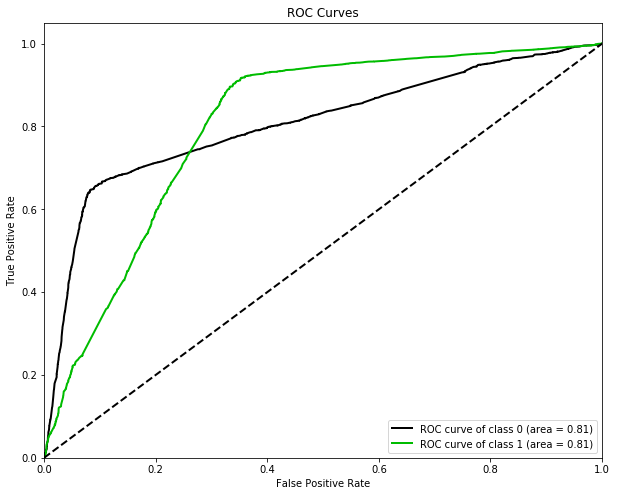

In [24]:
# RoC Curve
skplt.metrics.plot_roc(Y_test, Y_pred_prob,figsize=(10,8),plot_macro=False,plot_micro=False)